# Exercise 5

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Importing Dataset

In [4]:
dataBase = pd.read_csv('train.csv')
dataBase.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Question 1
Predicting CentralAir using SalePrice

Response Variable : **CentralAir**     
Predictor Feature : **SalePrice**

In [5]:
print("Data dims : ", dataBase.shape)

Data dims :  (1460, 81)


In [6]:
centralAir = pd.DataFrame(dataBase['CentralAir'])
salePrice = pd.DataFrame(dataBase['SalePrice'])

In [7]:
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
central_train, central_test, sale_train, sale_test = train_test_split(centralAir, salePrice, test_size = 0.20, random_state=1)

# Check the sample sizes
print("Train Set :", central_train.shape, sale_train.shape)
print("Test Set  :", central_test.shape, sale_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [8]:
# Summary Statistics for CentralAir Train
central_train["CentralAir"].value_counts()

Y    1094
N      74
Name: CentralAir, dtype: int64

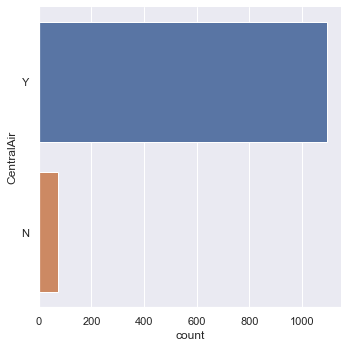

In [9]:
# Count Plot for CentralAir Train
sb.catplot(y = "CentralAir", data = central_train, kind = "count")

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

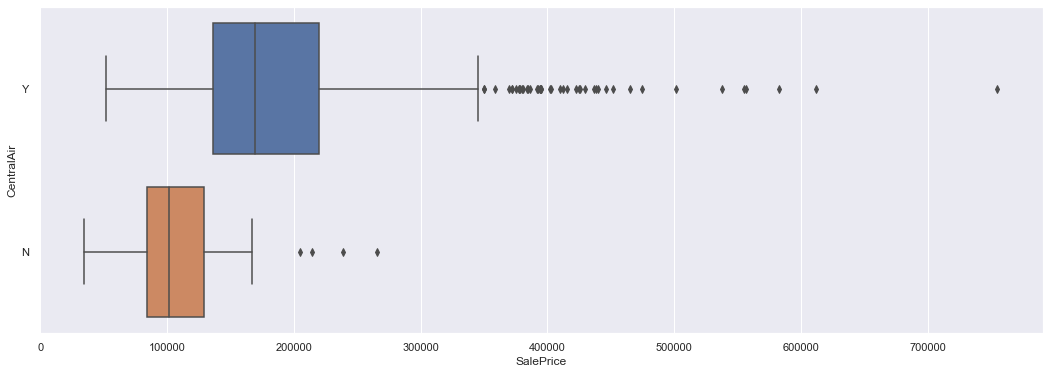

In [10]:
# Create a joint dataframe by concatenating SalePrice and CentralAir
trainDF = pd.concat([sale_train, central_train], axis = 1).reindex(sale_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

C:\Users\kelvi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

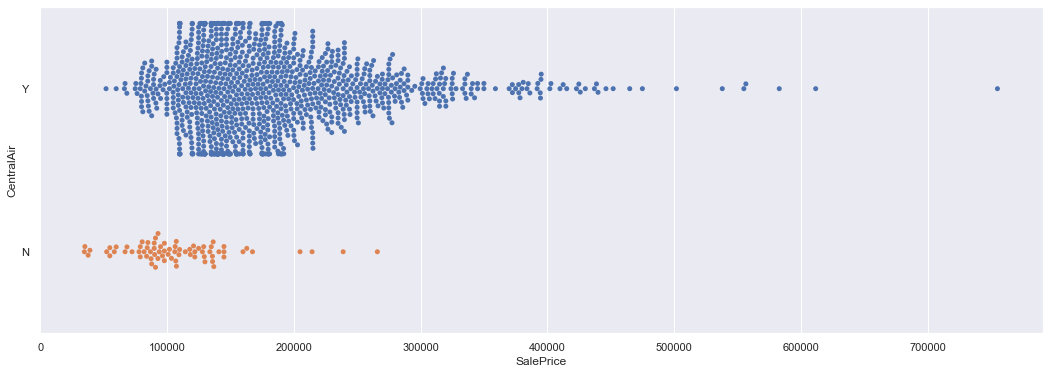

In [11]:
# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

#### 1a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of maxdepth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

In [12]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

In [13]:
#Train set max_depth=2
train2Tree = DecisionTreeClassifier(max_depth=2)
train2Tree.fit(sale_train, central_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'SalePrice <= 107700.0\ngini = 0.119\nsamples = 1168\nvalue = [74, 1094]\nclass = Air-Condition'),
 Text(167.4, 326.16, 'SalePrice <= 59250.0\ngini = 0.476\nsamples = 113\nvalue = [44, 69]\nclass = Air-Condition'),
 Text(83.7, 108.72000000000003, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Air-Condition t'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.453\nsamples = 104\nvalue = [36, 68]\nclass = Air-Condition'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137225.0\ngini = 0.055\nsamples = 1055\nvalue = [30, 1025]\nclass = Air-Condition'),
 Text(418.5, 108.72000000000003, 'gini = 0.149\nsamples = 234\nvalue = [19, 215]\nclass = Air-Condition'),
 Text(585.9, 108.72000000000003, 'gini = 0.026\nsamples = 821\nvalue = [11, 810]\nclass = Air-Condition')]

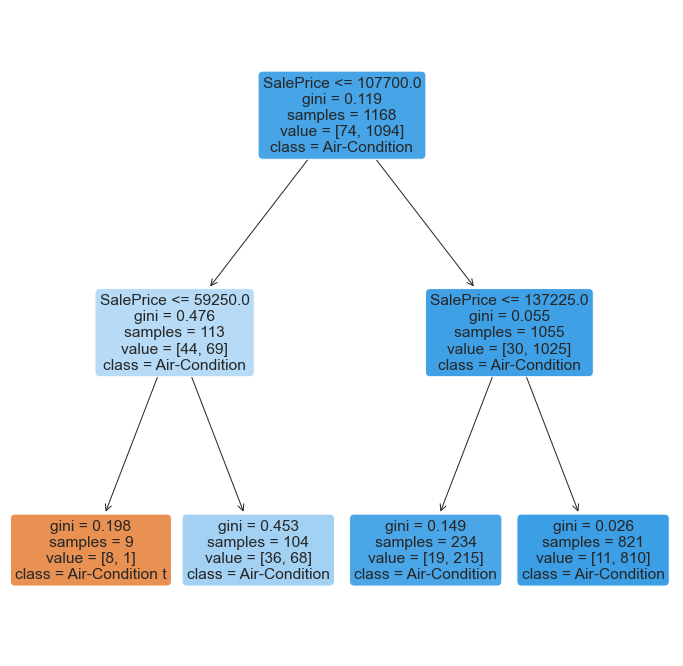

In [14]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(train2Tree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Air-Condition t","Air-Condition"])

In [15]:
#Train set max_depth=4
train4Tree = DecisionTreeClassifier(max_depth=4)
train4Tree.fit(sale_train, central_train)

DecisionTreeClassifier(max_depth=4)

[Text(892.3189655172413, 1712.34, 'SalePrice <= 107700.0\ngini = 0.119\nsamples = 1168\nvalue = [74, 1094]\nclass = Air-Condition'),
 Text(370.3965517241379, 1331.82, 'SalePrice <= 59250.0\ngini = 0.476\nsamples = 113\nvalue = [44, 69]\nclass = Air-Condition'),
 Text(134.68965517241378, 951.3, 'SalePrice <= 45650.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Air-Condition t'),
 Text(67.34482758620689, 570.78, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Air-Condition t'),
 Text(202.03448275862067, 570.78, 'SalePrice <= 52250.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Air-Condition t'),
 Text(134.68965517241378, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Air-Condition'),
 Text(269.37931034482756, 190.26, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Air-Condition t'),
 Text(606.103448275862, 951.3, 'SalePrice <= 106075.0\ngini = 0.453\nsamples = 104\nvalue = [36, 68]\nclass = Air-Condition'),
 Text(471.41379310344826, 570.78, 'SalePrice <= 98150

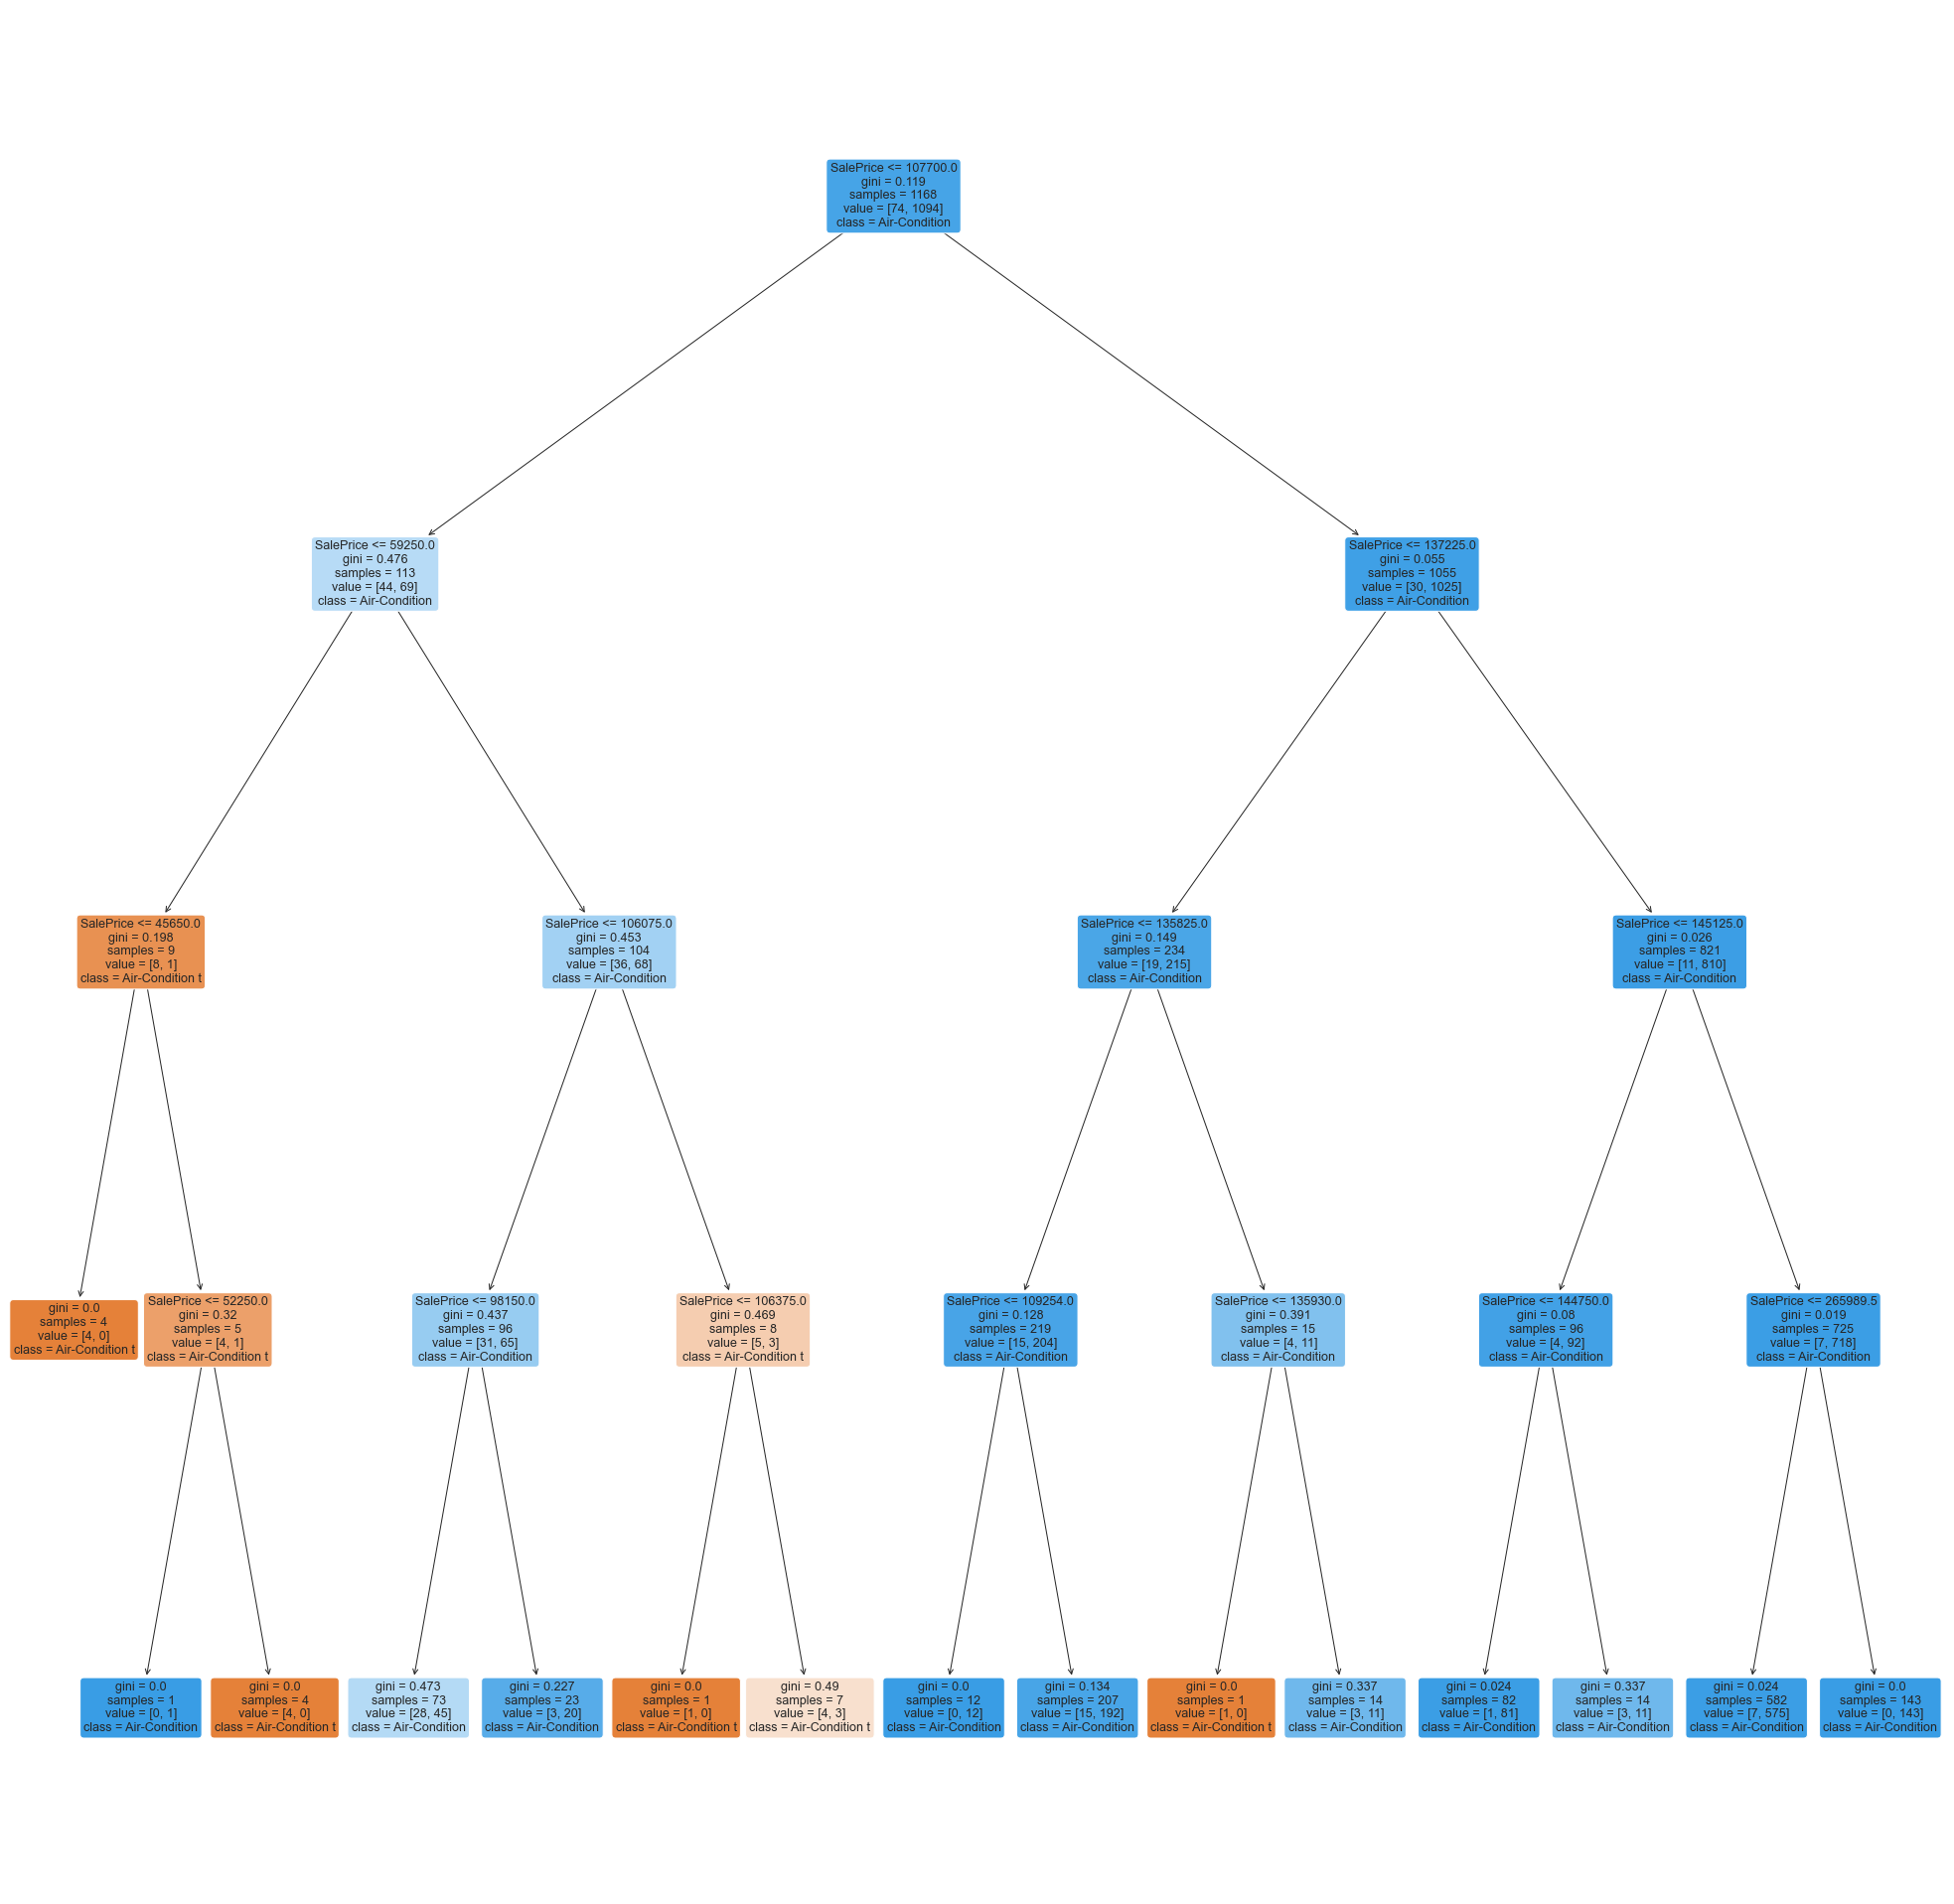

In [16]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(35,35))
plot_tree(train4Tree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Air-Condition t","Air-Condition"])

#### 1b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for boththe trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

#### max_depth = 2

In [18]:
# Predict Response corresponding to Predictors
train_pred = train2Tree.predict(sale_train)
test_pred = train2Tree.predict(sale_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", train2Tree.score(sale_train, central_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", train2Tree.score(sale_test, central_test))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9426369863013698

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.934931506849315



<AxesSubplot:>

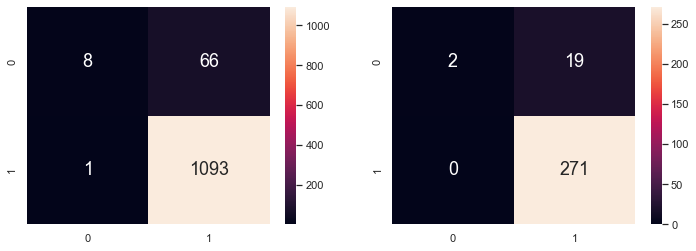

In [19]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(central_train, train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(central_test, test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [20]:
print("Train Dataset")
TN, FP, FN, TP = confusion_matrix(central_train, train_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Train Dataset
True Postive is:   0.9990859232175503
False Postive is:  0.8918918918918919


In [21]:
print("Test Dataset")
TN, FP, FN, TP = confusion_matrix(central_test, test_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Test Dataset
True Postive is:   1.0
False Postive is:  0.9047619047619048


#### max_depth = 4

In [22]:
# Predict Response corresponding to Predictors
train4_pred = train4Tree.predict(sale_train)
test4_pred = train4Tree.predict(sale_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", train4Tree.score(sale_train, central_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", train4Tree.score(sale_test, central_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9460616438356164

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822



<AxesSubplot:>

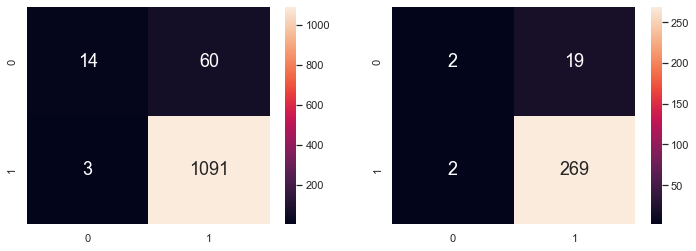

In [23]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(central_train, train4_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(central_test, test4_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [24]:
print("Train Dataset")
TN, FP, FN, TP = confusion_matrix(central_train, train4_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Train Dataset
True Postive is:   0.9972577696526508
False Postive is:  0.8108108108108109


In [25]:
print("Test Dataset")
TN, FP, FN, TP = confusion_matrix(central_test, test4_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Test Dataset
True Postive is:   0.992619926199262
False Postive is:  0.9047619047619048


SalePrice 

**Depth = 2**

Train Classification Accuracy 	: 0.9426369863013698 <br>
Test Classification Accuracy 	: 0.934931506849315 <br>

Train True Postive is:   0.9990859232175503 <br>
Test True Postive is:   1.0 <br>

Train False Postive is:  0.8918918918918919 <br>
Test False Postive is:  0.9047619047619048 <br>

**Depth = 4**

Train Classification Accuracy 	: 0.9460616438356164 <br>
Test Classification Accuracy 	: 0.928082191780822 <br>

Train True Postive is:   0.9872029250457038 <br>
Test True Postive is:   0.959409594095941 <br>

Train False Postive is:  0.6621621621621622 <br>
Test False Postive is:  0.9047619047619048 <br>

### Ans 1b) 
For classification accuracy and true positive, both dataset have similar values, hence unable to determine <br>

As for the false positive, the rate for the depth equals to 4 for the train set is much lower then the false postive for depth equal 2.

Hence, the model with depth 4 is more accurate. 

---

## Question 2
Predicting CentralAir using other variable

Response Variable : **CentralAir**     
Predictor Feature : **OverallQual and YearBuilt**

### Part1: CentralAir and OverallQual

Response Variable : **CentralAir**     
Predictor Feature : **OverallQual**

In [26]:
overallQua = pd.DataFrame(dataBase['OverallQual'])
centralAir = pd.DataFrame(dataBase['CentralAir'])

In [27]:
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
central_train, central_test, overall_train, overall_test = train_test_split(centralAir, overallQua, test_size = 0.20, random_state=1)

# Check the sample sizest
print("Train Set :", central_train.shape, overall_train.shape)
print("Test Set  :", central_test.shape, overall_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [28]:
#for train dataset depth=4 
train4Tree.fit(overall_train, central_train)

DecisionTreeClassifier(max_depth=4)

In [29]:
# Predict Response corresponding to Predictors
train4_pred = train4Tree.predict(overall_train)
test4_pred = train4Tree.predict(overall_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", train4Tree.score(overall_train, central_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", train4Tree.score(overall_test, central_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9392123287671232

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.934931506849315



<AxesSubplot:>

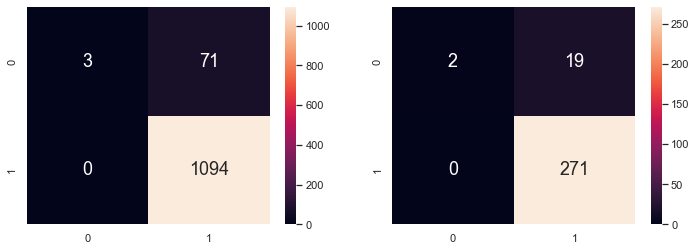

In [30]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(central_train, train4_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(central_test, test4_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [31]:
print("Train Dataset")
TN, FP, FN, TP = confusion_matrix(central_train, train4_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Train Dataset
True Postive is:   1.0
False Postive is:  0.9594594594594594


In [32]:
print("Test Dataset")
TN, FP, FN, TP = confusion_matrix(central_test, test4_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Test Dataset
True Postive is:   1.0
False Postive is:  0.9047619047619048


### Part 2: CentralAir and YearBuilt

Response Variable : **CentralAir**     
Predictor Feature : **YearBuilt**

In [33]:
yearBuilt = pd.DataFrame(dataBase['YearBuilt'])
centralAir = pd.DataFrame(dataBase['CentralAir'])

In [34]:
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
central_train, central_test, year_train, year_test = train_test_split(centralAir, yearBuilt, test_size = 0.20, random_state=1)

# Check the sample sizes
print("Train Set :", central_train.shape, year_train.shape)
print("Test Set  :", central_test.shape, year_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [35]:
#for train dataset depth=4 
train4Tree.fit(year_train, central_train)

DecisionTreeClassifier(max_depth=4)

In [36]:
# Predict Response corresponding to Predictors
train4_pred = train4Tree.predict(year_train)
test4_pred = train4Tree.predict(year_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", train4Tree.score(year_train, central_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", train4Tree.score(year_test, central_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9460616438356164

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8972602739726028



<AxesSubplot:>

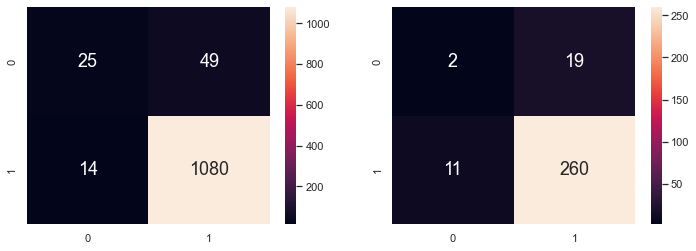

In [37]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(central_train, train4_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(central_test, test4_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [38]:
print("Train Dataset")
TN, FP, FN, TP = confusion_matrix(central_train, train4_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Train Dataset
True Postive is:   0.9872029250457038
False Postive is:  0.6621621621621622


In [39]:
print("Test Dataset")
TN, FP, FN, TP = confusion_matrix(central_test, test4_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Test Dataset
True Postive is:   0.959409594095941
False Postive is:  0.9047619047619048


**OverallQual**

Train Classification Accuracy 	: 0.9392123287671232<br>
Test Classification Accuracy 	: 0.934931506849315 <br>

Train True Postive is:  1.0 <br>
Test True Postive is:   1.0 <br>

Train False Postive is:  0.9594594594594594 <br>
Test False Postive is:  0.9047619047619048 <br>

**YearBuilt**

Train Classification Accuracy 	: 0.9460616438356164 <br>
Test Classification Accuracy 	: 0.8972602739726028 <br>

Train True Postive is:   0.9872029250457038 <br>
Test True Postive is:   0.959409594095941 <br>

Train False Postive is:  0.6621621621621622 <br>
Test False Postive is:  0.9047619047619048 <br>

### Ans 2
For classification accuracy, both dataset have similar values, hence unable to determine <br>

As for the true positive, TP of OverallQual is much as compared to the TP of YearBuilt <br>

As for the false positive,  the FP rate for both OverallQual and YearBuilt is similar.<br>

Hence, the model OverallQual is a better model to predict CentralAir

---

## Question 3

### Ans 3a) 
Based on observation, the leaf node (4 row, 6th from the left) has the most number of false positive with a gini index of 0.49

In [43]:
SalePrice_CentralAir = pd.concat([sale_train, central_train], axis=1).reindex(central_train.index)
editSaleCentral = SalePrice_CentralAir.drop(SalePrice_CentralAir[SalePrice_CentralAir.SalePrice > 106375].index)
display(editSaleCentral)

,SalePrice,CentralAir
520,106250,N
711,102776,Y
1325,55000,N
671,103600,N
935,79900,Y
...,...,...
1001,86000,Y
398,67000,Y
749,98000,N
235,89500,Y


### Ans 3b) 

In [44]:
edit2SaleCentral = editSaleCentral.drop(editSaleCentral[editSaleCentral.CentralAir == "Y"].index)
print("Total False Positive is :" +str(edit2SaleCentral.size))

Total False Positive is :80


In [46]:
display(edit2SaleCentral)

,SalePrice,CentralAir
520,106250,N
1325,55000,N
671,103600,N
821,93000,N
916,35311,N
620,67000,N
1062,90000,N
495,34900,N
242,79000,N
968,37900,N
